# Imports and environment setup

In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Preprocessing

In [466]:
data = pd.read_csv('data/iris.data',names=['sepal_length','sepal_width','petal_length','petal_width','species'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [468]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [469]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [470]:
training, testing = train_test_split(data, test_size = 0.3, stratify = data['species'], random_state = 40)

In [471]:
#Normalize/Standardize data here
train = training.iloc[:,:-1]
target = training['species']
scaler = MinMaxScaler()
train.iloc[:,:] = scaler.fit_transform(train.iloc[:,:])
train

,sepal_length,sepal_width,petal_length,petal_width
8,0.029412,0.318182,0.067797,0.041667
117,1.000000,0.727273,0.966102,0.875000
112,0.735294,0.363636,0.762712,0.833333
13,0.000000,0.363636,0.016949,0.000000
25,0.205882,0.363636,0.101695,0.041667
...,...,...,...,...
55,0.411765,0.272727,0.593220,0.500000
70,0.470588,0.454545,0.644068,0.708333
129,0.852941,0.363636,0.813559,0.625000
16,0.323529,0.772727,0.050847,0.125000


In [472]:
target

8          Iris-setosa
117     Iris-virginica
112     Iris-virginica
13         Iris-setosa
25         Iris-setosa
            ...       
55     Iris-versicolor
70     Iris-versicolor
129     Iris-virginica
16         Iris-setosa
57     Iris-versicolor
Name: species, Length: 105, dtype: object

# Exploratory Data Analysis

### Histograms for four features after data normalisation

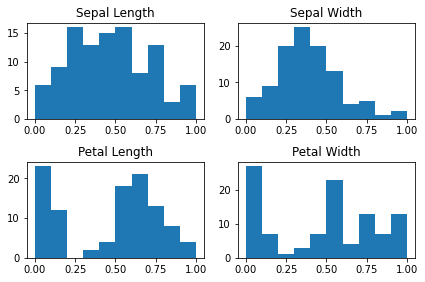

In [473]:
no_of_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = no_of_bins)
axs[0,0].set_title('Sepal Length')
axs[0,1].hist(train['sepal_width'], bins = no_of_bins)
axs[0,1].set_title('Sepal Width')
axs[1,0].hist(train['petal_length'], bins = no_of_bins)
axs[1,0].set_title('Petal Length')
axs[1,1].hist(train['petal_width'], bins = no_of_bins)
axs[1,1].set_title('Petal Width')
fig.tight_layout(pad=1.0)

In [474]:
# adding the target species column to the data
train['species'] = pd.Series(target)
train.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
8,0.029412,0.318182,0.067797,0.041667,Iris-setosa
117,1.000000,0.727273,0.966102,0.875000,Iris-virginica
112,0.735294,0.363636,0.762712,0.833333,Iris-virginica
13,0.000000,0.363636,0.016949,0.000000,Iris-setosa
25,0.205882,0.363636,0.101695,0.041667,Iris-setosa


### Scatterplots of all-paired attributes by using seaborn’s pairplot function

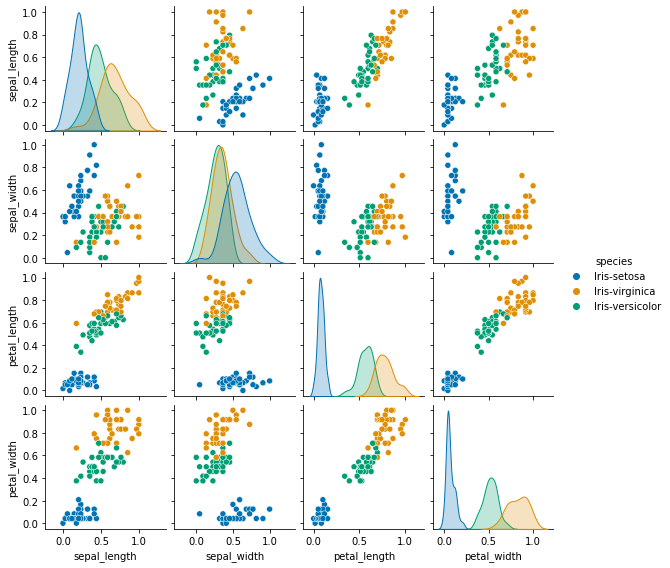

In [475]:
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind')

### Parallel coordinate plot

Text(0.5, 1.0, 'Parallel coordinate plot')

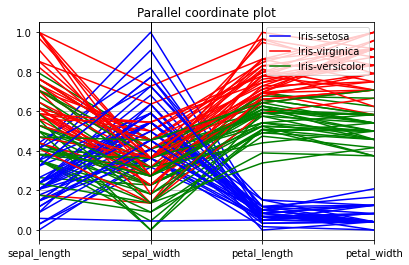

In [476]:
pd.plotting.parallel_coordinates(train, "species", color = ['blue', 'red', 'green'])
plt.title("Parallel coordinate plot")

As we can see, petal measurements can separate species better than the sepal ones.

### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

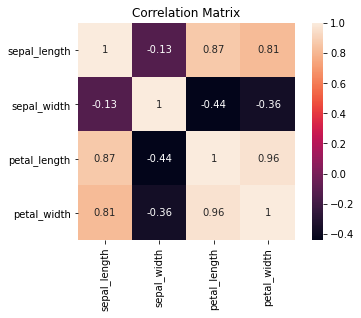

In [477]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True)
plt.title("Correlation Matrix")

Here The petal measurements have highly positive correlation, while the sepal one are uncorrelated. Note that the petal features also have relatively high correlation with sepal_length, but not with sepal_width.

# Model Training

In [478]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.70)